# Data Mining of Legacy Data 

In [1]:
%matplotlib inline
import scikitplot as skplt
from sklearn.metrics  import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data = pd.read_csv('Documents/600092_data.csv')

# Data Understanding

In [3]:
data

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [4]:
data.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [5]:
df = pd.DataFrame(data)

Checking each column for inconsistancies and Null values.

In [6]:
Randomid = df['Random']

In [7]:
Randomid.value_counts(dropna=False)

0.683506    4
0.899742    4
0.576184    4
0.506597    4
0.602437    3
           ..
0.322376    1
0.219048    1
0.363625    1
0.346396    1
0.219026    1
Name: Random, Length: 1222, dtype: int64

In [8]:
Patientid = df['Id']

In [9]:
Patientid.value_counts(dropna=False)

280575    1
250562    1
295609    1
174778    1
170683    1
         ..
259831    1
163168    1
215064    1
218007    1
221184    1
Name: Id, Length: 1520, dtype: int64

In [10]:
Indication = df['Indication']

In [11]:
#Has 3 NaN values that require cleaning and also has a duplicate entry as 
#ASx and Asx as the S is capitalised in one category but not the other
Indication.value_counts(dropna=False)

A-F    493
CVA    416
TIA    390
ASx    186
Asx     32
NaN      3
Name: Indication, dtype: int64

In [12]:
Diabetes = df['Diabetes']

In [13]:
#Has 2 NaN values that require cleaning
Diabetes.value_counts(dropna=False)

no     1441
yes      77
NaN       2
Name: Diabetes, dtype: int64

In [14]:
IHD = df['IHD']

In [15]:
IHD.value_counts(dropna=False)

no     801
yes    719
Name: IHD, dtype: int64

In [16]:
Hypertension = df['Hypertension']

In [17]:
#Has 3 NaN values to be cleaned
Hypertension.value_counts(dropna=False)

no     784
yes    733
NaN      3
Name: Hypertension, dtype: int64

In [18]:
Arrhythmia = df['Arrhythmia']

In [19]:
Arrhythmia.value_counts(dropna=False)

no     1190
yes     330
Name: Arrhythmia, dtype: int64

In [20]:
History = df['History']

In [21]:
#Has 2 NaN values that need to be cleaned
History.value_counts(dropna=False)

no     1494
yes      24
NaN       2
Name: History, dtype: int64

In [22]:
IPSI = df['IPSI']

In [23]:
#Has 4 NaN values which need to be cleaned
IPSI.value_counts(dropna=False)

70.0    231
75.0    222
80.0    188
90.0    175
95.0    157
73.0     83
85.0     77
76.0     75
78.0     50
68.0     32
99.0     31
60.0     29
81.0     28
82.0     25
50.0     23
65.0     14
71.0     13
79.0     13
77.0      9
55.0      9
97.0      7
74.0      7
51.0      7
NaN       4
69.0      3
84.0      2
72.0      2
67.0      2
98.0      1
35.0      1
Name: IPSI, dtype: int64

Blank data in contra

In [24]:
df['Contra'].value_counts(dropna = False)

100     244
20      191
30      150
50      131
40      101
60       93
50       55
10       49
100      39
90       35
70       34
75       32
95       32
25       30
75       29
80       29
80       24
85       24
35       22
70       19
15       18
55       14
65       13
30       13
51       11
85       11
90       10
55        9
40        9
53        9
73        7
45        6
60        6
35        5
65        4
16        4
62        3
79        2
          1
20        1
10        1
Name: Contra, dtype: int64

Unknown values and NaNs in label

In [25]:
label = df['label']
label.value_counts(dropna=False)

NoRisk     1008
Risk        507
NaN           3
Unknown       2
Name: label, dtype: int64

Data Analysis Ends and Data cleaning commences
The data is copied as to not change or delete the initial data provided.

# Data Cleaning begins and Data is Analysed for Modeling

In [133]:
Data_Copy = df.copy()

This removed all NaN values as since it is medical records and a corelation cannot be seen it is safest just to remove the data and prevent any further data corruption.

In [134]:
Data_Copy = Data_Copy.drop(['Random','Id'], axis = 1 )
Data_Copy.dropna(inplace=True)

Fix the anomaly that occured in the Indication Column of attributes showing the same value but different capitalisation as if it is not fixed it will cause inconsitancies within graphs.

In [175]:
Data_Copy['Indication'].replace('ASx','Asx',inplace=True)
Data_Copy['Contra'].replace(' ', np.nan, inplace=True)
Data_Copy.dropna(inplace=True)

In [136]:
indication_change = Data_Copy['Indication']
indication_change.value_counts(dropna=False)

A-F    489
CVA    408
TIA    388
Asx    217
Name: Indication, dtype: int64

Removing the unknown value as it is not a valid option for the label column

In [137]:
Data_Copy=Data_Copy[Data_Copy.label != 'Unknown']

Data Cleaning Complete.

Checking for data trends in graphs to be used in modelling.

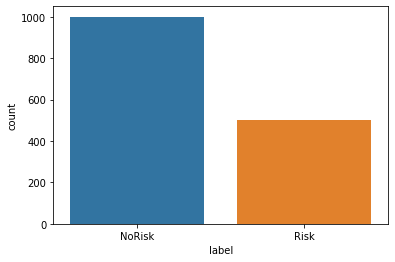

In [138]:
x=Data_Copy['label']
sns.countplot(x=x, data=Data_Copy)

In [139]:
Data_Copy['label'].value_counts(normalize=True) * 100

NoRisk    66.666667
Risk      33.333333
Name: label, dtype: float64

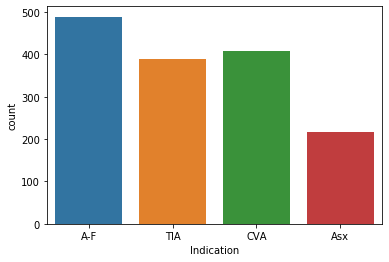

In [140]:
x=Data_Copy['Indication']
sns.countplot(x=x, data=Data_Copy)

In [141]:
Data_Copy['Indication'].value_counts(normalize=True) * 100

A-F    32.600000
CVA    27.133333
TIA    25.866667
Asx    14.400000
Name: Indication, dtype: float64

Overwhelming amount of no's should check out.

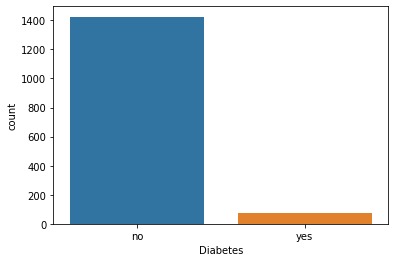

In [142]:
x=Data_Copy['Diabetes']
sns.countplot(x=x, data=Data_Copy)

In [143]:
Data_Copy['Diabetes'].value_counts(normalize=True) * 100

no     95.0
yes     5.0
Name: Diabetes, dtype: float64

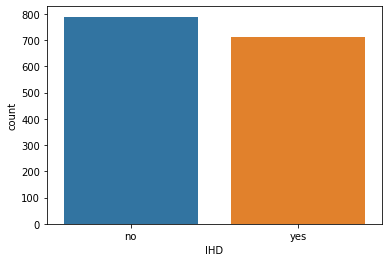

In [144]:
x=Data_Copy['IHD']
sns.countplot(x=x, data=Data_Copy)

In [145]:
Data_Copy['IHD'].value_counts(normalize=True) * 100

no     52.6
yes    47.4
Name: IHD, dtype: float64

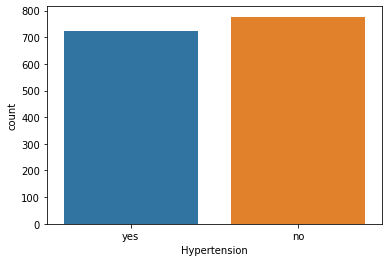

In [146]:
x=Data_Copy['Hypertension']
sns.countplot(x=x, data=Data_Copy)

In [147]:
Data_Copy['Hypertension'].value_counts(normalize=True) * 100

no     51.8
yes    48.2
Name: Hypertension, dtype: float64

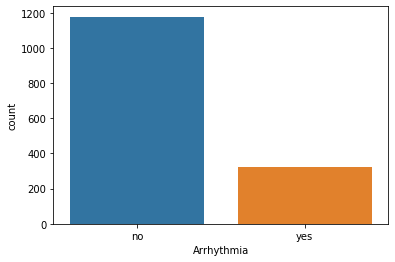

In [148]:
x=Data_Copy['Arrhythmia']
sns.countplot(x=x, data=Data_Copy)

In [149]:
Data_Copy['Arrhythmia'].value_counts(normalize=True) * 100

no     78.466667
yes    21.533333
Name: Arrhythmia, dtype: float64

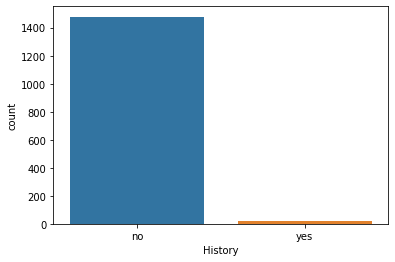

In [150]:
x=Data_Copy['History']
sns.countplot(x=x, data=Data_Copy)

In [151]:
Data_Copy['History'].value_counts(normalize=True) * 100

no     98.533333
yes     1.466667
Name: History, dtype: float64

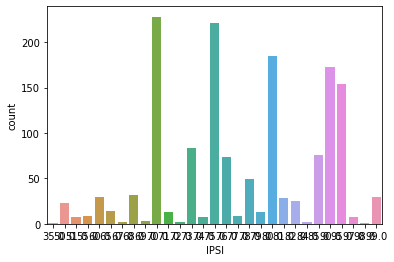

In [152]:
x=Data_Copy['IPSI']
sns.countplot(x=x, data=Data_Copy)

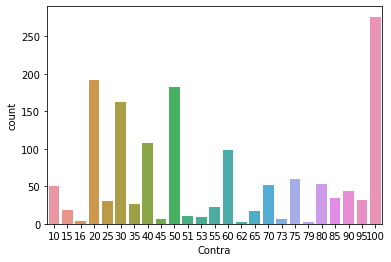

In [153]:
Data_Copy['Contra']=Data_Copy.Contra.astype(int)
x=Data_Copy['Contra']
sns.countplot(x=x, data=Data_Copy)

Data to model History, Arrhythmia,Diabetes and maybe label. Other possible options Contra and IPSI

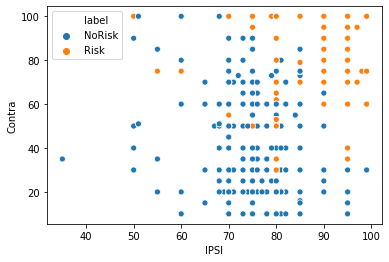

In [154]:
sns.scatterplot(x='IPSI',y='Contra',hue='label',data=Data_Copy)

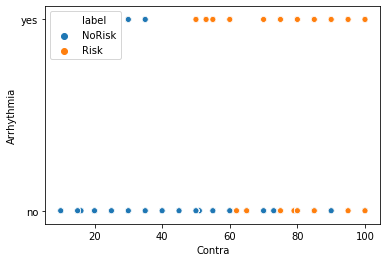

In [155]:
sns.scatterplot(x='Contra',y='Arrhythmia',hue='label',data=Data_Copy)

## Fig.1 Contra vs Hypertension

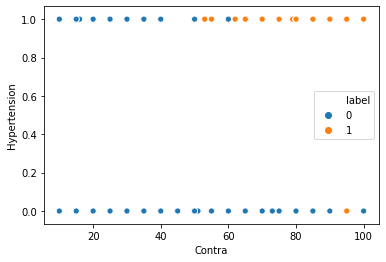

In [173]:
sns.scatterplot(x='Contra',y='Hypertension',hue='label',data=Data_Copy)

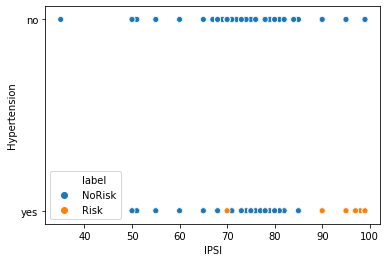

In [157]:
sns.scatterplot(x='IPSI',y='Hypertension',hue='label',data=Data_Copy)

## Fig.2 IPSI vs Arrhythmia

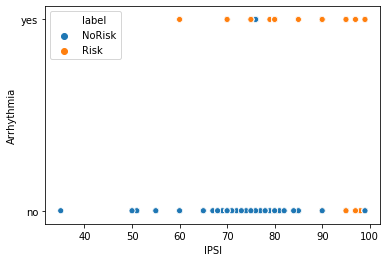

In [158]:
sns.scatterplot(x='IPSI',y='Arrhythmia',hue='label',data=Data_Copy)

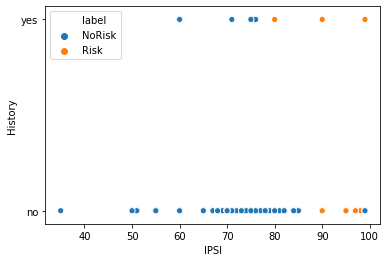

In [159]:
sns.scatterplot(x='IPSI',y='History',hue='label',data=Data_Copy)

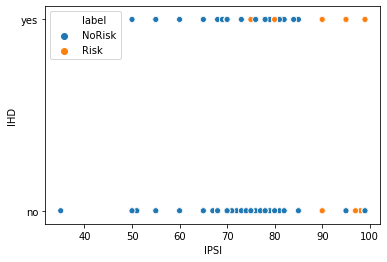

In [160]:
sns.scatterplot(x='IPSI',y='IHD',hue='label',data=Data_Copy)

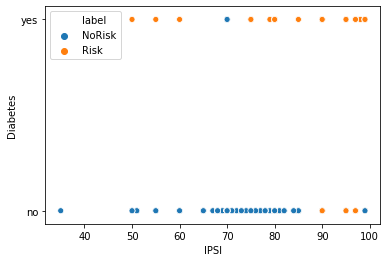

In [161]:
sns.scatterplot(x='IPSI',y='Diabetes',hue='label',data=Data_Copy)

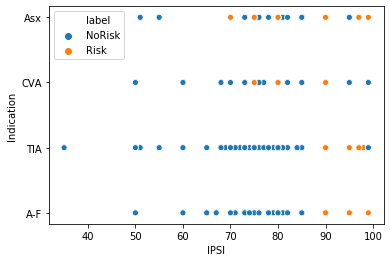

In [162]:
sns.scatterplot(x='IPSI',y='Indication',hue='label',data=Data_Copy)

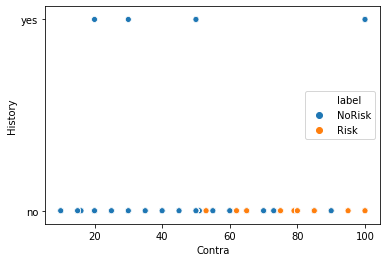

In [163]:
sns.scatterplot(x='Contra',y='History',hue='label',data=Data_Copy)

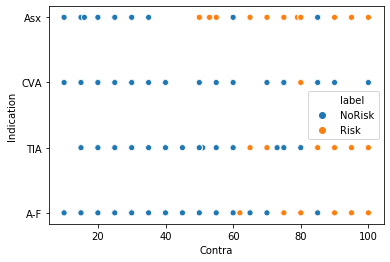

In [164]:
sns.scatterplot(x='Contra',y='Indication',hue='label',data=Data_Copy)

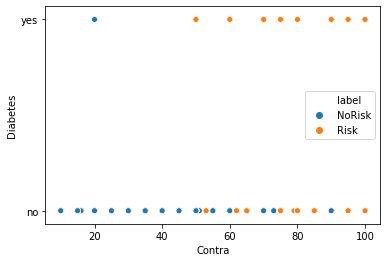

In [165]:
sns.scatterplot(x='Contra',y='Diabetes',hue='label',data=Data_Copy)

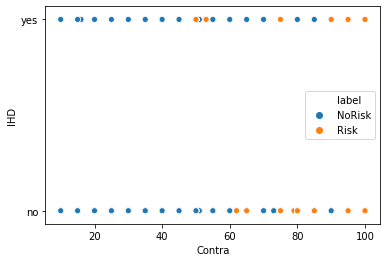

In [166]:
sns.scatterplot(x='Contra',y='IHD',hue='label',data=Data_Copy)

In [167]:
Data_Copy['Diabetes']=pd.Series(np.where(Data_Copy.Diabetes.values == 'yes', 1, 0),Data_Copy.index)

In [168]:
Data_Copy['History']=pd.Series(np.where(Data_Copy.History.values == 'yes', 1, 0),Data_Copy.index)

In [169]:
Data_Copy['label']=pd.Series(np.where(Data_Copy.label.values == 'Risk', 1, 0),Data_Copy.index)

In [170]:
Data_Copy['Arrhythmia']=pd.Series(np.where(Data_Copy.Arrhythmia.values == 'yes', 1, 0),Data_Copy.index)

In [171]:
Data_Copy['IHD']=pd.Series(np.where(Data_Copy.IHD.values == 'yes', 1, 0),Data_Copy.index)

In [172]:
Data_Copy['Hypertension']=pd.Series(np.where(Data_Copy.Hypertension.values == 'yes', 1, 0),Data_Copy.index)

# Modelling

### Logistic Regression Model

In [66]:
x = Data_Copy[['IPSI','Contra','Arrhythmia','Hypertension']]
y = Data_Copy['label']

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True,test_size = .3)
x_lgtrain=x_train
x_lgtest=x_test
y_lgtrain=y_train
y_lgtest=y_test 

In [68]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced')

In [69]:
model.fit(
    x_lgtrain,
    y_lgtrain
)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
prediction = model.predict(x_lgtest)

The predicted results equate to only 0 which is no this means that whenever Diabetes is no History is very likely to also be no

### Modelling using a MLP model

In [71]:
x_mlptrain=x_train
x_mlptest=x_test
y_mlptrain=y_train
y_mlptest=y_test

In [72]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000,solver='sgd')

In [73]:
clf.fit(x_mlptrain,y_mlptrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [74]:
y_MLPpred = clf.predict(x_mlptest)

# Tree Model

In [75]:
x_treetrain=x_train
x_treetest=x_test 
y_treetrain=y_train
y_treetest=y_test

In [76]:
clftree = DecisionTreeClassifier()

clftree = clftree.fit(x_treetrain,y_treetrain)

y_treepred = clftree.predict(x_treetest)

# Evaluation

## Evaluation of Logistic Regression Model

## Fig.3

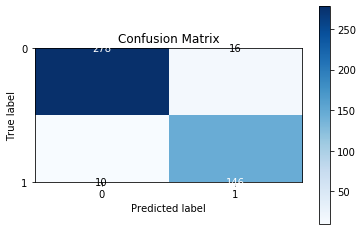

In [106]:
skplt.metrics.plot_confusion_matrix(
    y_lgtest,prediction,
    normalize=False
)

In [78]:
accuracy_score(y_lgtest,prediction)*100

94.22222222222221

In [176]:
CMRM=confusion_matrix(y_lgtest,prediction)
tn,fp,fn,tp = confusion_matrix(y_lgtest,prediction).ravel()

In [80]:
CMRM

array([[278,  16],
       [ 10, 146]], dtype=int64)

In [81]:
spec = tn/(tn+fp)*100
spec

94.5578231292517

In [82]:
sens = tp/(tp+fn)*100
sens

93.58974358974359

In [83]:
precision1 = tp/(tp+fp)*100
precision1

90.12345679012346

In [124]:
recall = tp/(tp+fn)*100
recall

93.58974358974359

In [107]:
mean_absolute_error(y_lgtest, prediction) *100

5.777777777777778

In [108]:
mse = mean_squared_error(y_lgtest, prediction) *100
sqrt(mse)

2.4037008503093262

# Multilayer Perceptron Evaluation Metrics

## Fig.4

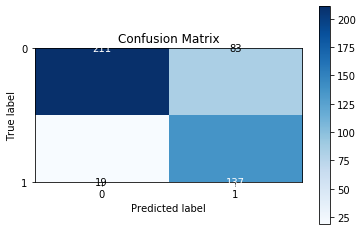

In [86]:
skplt.metrics.plot_confusion_matrix(
    y_mlptest,y_MLPpred,
    normalize=False
)

In [87]:
accuracy_score(y_mlptest, y_MLPpred)*100

77.33333333333333

In [88]:
CmMlp=confusion_matrix(y_mlptest,y_MLPpred)
mlptn,mlpfp,mlpfn,mlptp = confusion_matrix(y_mlptest,y_MLPpred).ravel()

In [89]:
CmMlp

array([[211,  83],
       [ 19, 137]], dtype=int64)

In [91]:
sens1 = mlptp/(mlptp+mlpfn)*100
sens1

87.82051282051282

In [92]:
spec1 = mlptn/(mlptn+mlpfp)*100
spec1

71.7687074829932

In [93]:
precision1 = mlptp/(mlptp+mlpfp)*100
precision1

62.272727272727266

In [122]:
recall1 = mlptp/(mlptp+mlpfn)*100
recall1

87.82051282051282

In [114]:
mean_absolute_error(y_mlptest, y_MLPpred)*100

22.666666666666664

In [116]:
mlpmse=mean_squared_error(y_mlptest, y_MLPpred)
sqrt(mlpmse)*100

47.60952285695233

# Decision Tree Evaluation Metrics

## Fig.5

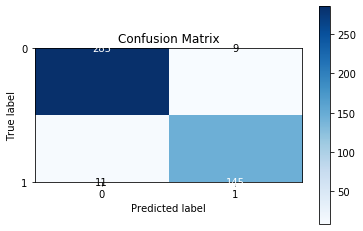

In [97]:
skplt.metrics.plot_confusion_matrix(
    y_treetest,y_treepred,
    normalize=False
)

In [98]:
Cmtree=confusion_matrix(y_treetest,y_treepred)
treetn,treefp,treefn,treetp = confusion_matrix(y_treetest,y_treepred).ravel()

In [99]:
accuracy_score(y_treetest, y_treepred)*100

95.55555555555556

In [100]:
sens2 = treetp/(treetp+treefn)*100
sens2

92.94871794871796

In [101]:
spec2 = treetn/(treetn+treefp)*100
spec2

96.93877551020408

In [102]:
precision2 = treetp/(treetp+treefp)*100
precision2

94.15584415584416

In [121]:
recall2 = treetp/(treetp+treefn)*100
recall2

92.94871794871796

In [117]:
mean_absolute_error(y_treetest, y_treepred)*100

4.444444444444445

In [119]:
treemse=mean_squared_error(y_treetest, y_treepred)*100
sqrt(treemse)

2.1081851067789197